In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
MC = pd.read_csv('Mall_Customers.csv')
MC.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Lets Check for Null Values if Null Value exists let's remove it
MC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
MC.shape

(200, 5)

In [5]:
MC.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Here the Customer ID and Age column so we remove that and will take Annual Income and Spending Score for the further steps

In [10]:
X = MC.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [11]:
from sklearn.cluster import KMeans

In [9]:
# let us find no of clusters to be used for this model with the help of WCSS (With in clusters sum of squares)

<function matplotlib.pyplot.show(close=None, block=None)>

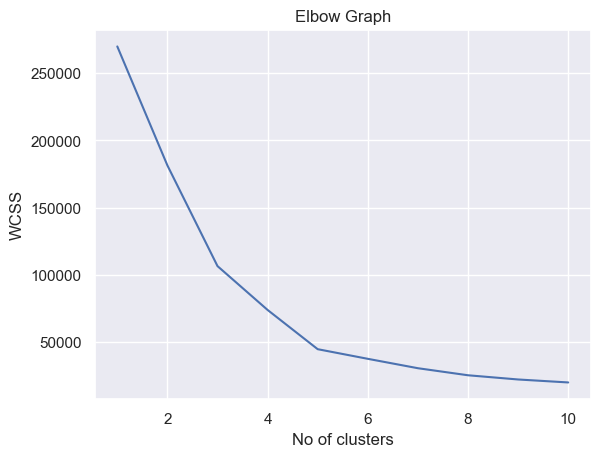

In [21]:
# let us run a for loop to find the inertia and will plot a elbow graph with the help of it

wcss = []
clusters = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    clusters.append(i)
plt.plot(clusters,wcss)
plt.title('Elbow Graph')
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show

# Hence we get optimum cluster , # Lets Train our model with Kmens

In [22]:
kmeans = KMeans(n_clusters = 5,init='k-means++',random_state=2)
clus = kmeans.fit_predict(X)
print(clus)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


# Data Visualization 


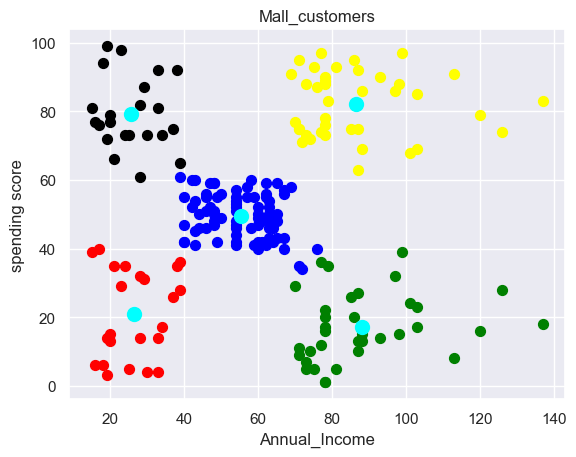

In [33]:
#plt.figure(figsize=(8,8))
plt.scatter(X[clus==0,0],X[clus==0,1],s=50,c='blue',label='clus1')
plt.scatter(X[clus==1,0],X[clus==1,1],s=50,c='green',label='clus2')
plt.scatter(X[clus==2,0],X[clus==2,1],s=50,c='red',label='clus3')
plt.scatter(X[clus==3,0],X[clus==3,1],s=50,c='yellow',label='clus4')
plt.scatter(X[clus==4,0],X[clus==4,1],s=50,c='black',label='clus5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='centroid')
plt.title("Mall_customers")
plt.xlabel("Annual_Income")
plt.ylabel("spending score")
plt.show()

# Observation

## Here We can clearly observe the people from cluster 3 had less number of anual income and they are not spend much on mall and people belongs to cluster 2 have a good income but they are not spend much on malls, Hence Malls can provide more offer and discounted sales to attract those peoples from cluster 3 and 2